In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2
from keras import layers, models

In [4]:
# Define paths to your dataset
train_data_dir = './train'
test_data_dir = './test'

In [5]:
# Set parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 20

In [6]:
# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

Found 2149 images belonging to 2 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 271 images belonging to 2 classes.


In [9]:
# Load MobileNetV2 pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [10]:
# Freeze the convolutional layers
base_model.trainable = False

In [11]:
# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [14]:
# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

Epoch 1/20


68/68 [==============================] - 51s 711ms/step - loss: 0.6381 - accuracy: 0.6319 - val_loss: 0.6123 - val_accuracy: 0.6531
Epoch 2/20
68/68 [==============================] - 47s 687ms/step - loss: 0.4939 - accuracy: 0.7664 - val_loss: 0.4738 - val_accuracy: 0.7638
Epoch 3/20
68/68 [==============================] - 46s 683ms/step - loss: 0.4174 - accuracy: 0.8246 - val_loss: 0.4077 - val_accuracy: 0.8339
Epoch 4/20
68/68 [==============================] - 45s 668ms/step - loss: 0.3695 - accuracy: 0.8688 - val_loss: 0.3660 - val_accuracy: 0.8635
Epoch 5/20
68/68 [==============================] - 48s 700ms/step - loss: 0.3283 - accuracy: 0.9009 - val_loss: 0.3394 - val_accuracy: 0.8708
Epoch 6/20
68/68 [==============================] - 47s 688ms/step - loss: 0.2977 - accuracy: 0.9107 - val_loss: 0.3097 - val_accuracy: 0.8856
Epoch 7/20
68/68 [==============================] - 47s 684ms/step - loss: 0.2704 - accuracy: 0.9255 - val_loss: 0.3148 - val_accuracy: 0.86

In [15]:
# Save the trained model
model.save('26_11_2023_drowsiness_detection_mobilenetv2.h5')

c:\Users\prans\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
# Plot the training and validation curves
import matplotlib.pyplot as plt

In [17]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

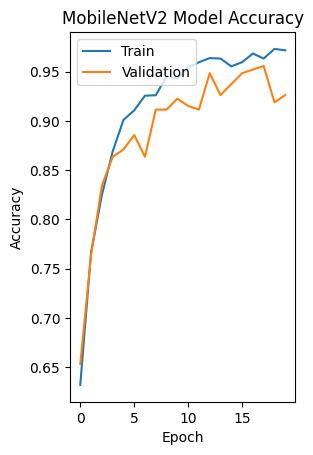

In [18]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV2 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

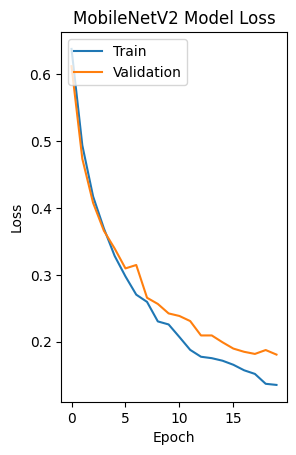

In [19]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV2 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

In [20]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>


Found 2149 images belonging to 2 classes.
Found 272 images belonging to 2 classes.
Found 268 images belonging to 2 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
Epoch 1/10


68/68 [=

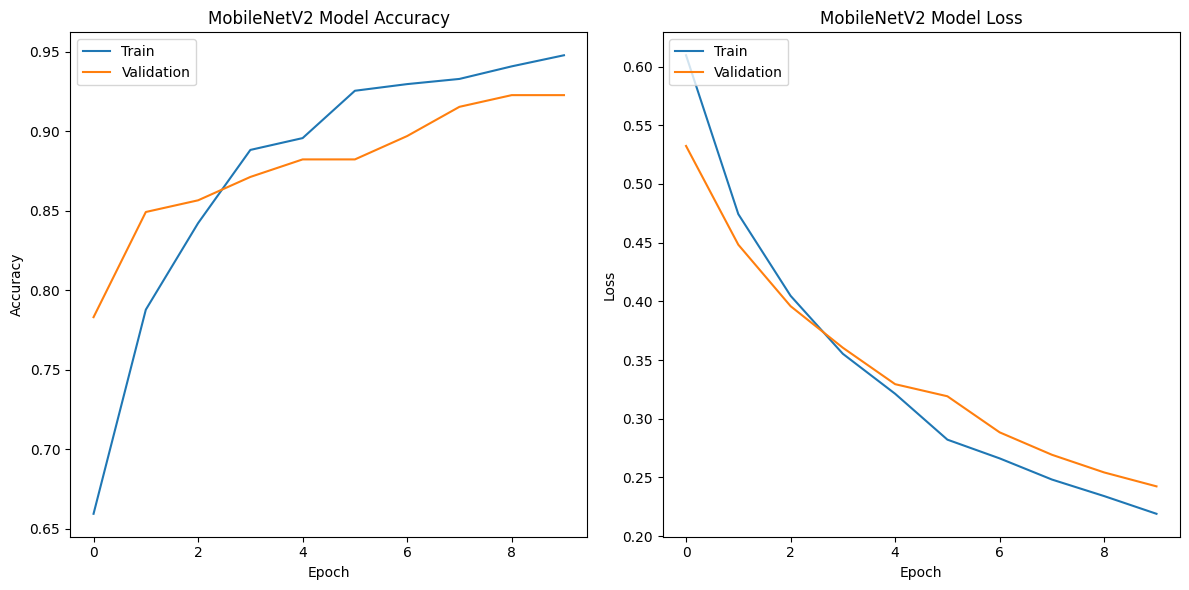

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2
from keras import layers, models

# Define paths to your dataset
train_data_dir = './train/'
test_data_dir = './test/'
val_data_dir = './val/'

# Set parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 10

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load MobileNetV2 pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

# Save the trained model
# model.save('drowsiness_detection_mobilenetv2.h5')

# Plot the training and validation curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV2 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV2 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [1]:
import os
os.getcwd()

'd:\\Notes\\Minor Project\\utarldd_dataset'

Batch Size = 32
epochs = 10

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2
from keras import layers, models

# Define paths to your dataset
train_data_dir = './train/'
test_data_dir = './test/'
val_data_dir = './val/'

# Set parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 10

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load MobileNetV2 pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

# Save the trained model
# model.save('drowsiness_detection_mobilenetv2.h5')

# Plot the training and validation curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV2 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV2 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


batch size = 64
epochs = 15

Found 2149 images belonging to 2 classes.
Found 272 images belonging to 2 classes.
Found 268 images belonging to 2 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
Epoch 1/15
34/34 [=====

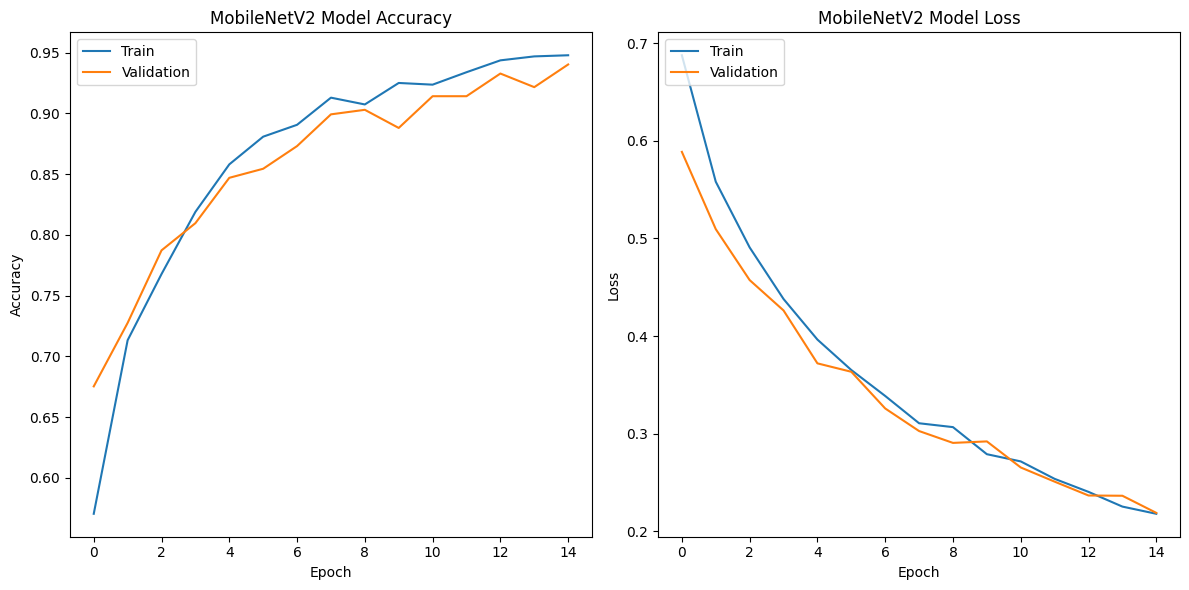

In [4]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2
from keras import layers, models

# Define paths to your dataset
train_data_dir = './train/'
test_data_dir = './test/'
val_data_dir = './val/'

# Set parameters
img_width, img_height = 224, 224
batch_size = 64
epochs = 15

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # assuming binary classification (drowsy and non-drowsy)
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load MobileNetV2 pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Save the trained model
# model.save('drowsiness_detection_mobilenetv2.h5')

# Plot the training and validation curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV2 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV2 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [5]:
model.save('27_11_2023_(15_29)_drowsiness_detection_mobilenetv2.h5')

c:\Users\prans\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
# Example: Extract features from the last convolutional layer before the flattening layer
feature_extraction_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)


In [7]:
os.getcwd()

'd:\\Notes\\Minor Project\\utarldd_dataset'

In [ ]:
for dirname, _, filenames in os.walk('./train/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [31]:
import os
import cv2
import numpy as np

# Define the paths to your raw image dataset
tired_folder = './train/tired'
alert_folder = './train/alert'

# Initialize empty lists to store raw images and labels
raw_images = []
labels = []

# Helper function to read and preprocess images
def read_and_preprocess_images(folder, label):
    image_files = [f for f in os.listdir(folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
    for image_file in image_files:
        image_path = os.path.join(folder, image_file)
        img = cv2.imread(image_path)
        img = cv2.resize(img, (224, 224))  # Adjust the size according to your model's input size
        img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
        raw_images.append(img)
        labels.append(label)

# Read and preprocess images labeled "drowsy" (tired)
read_and_preprocess_images(tired_folder, label='drowsy')

# Read and preprocess images labeled "Non-Drowsy" (alert)
read_and_preprocess_images(alert_folder, label='non-drowsy')


In [40]:
# Convert the lists to NumPy arrays
X = np.array(raw_images)
y = np.array(labels)

# Ensure the shape is appropriate for the model input
X = np.expand_dims(X, axis=0)  # Add an extra dimension for the batch size if needed

# Now 'X' is ready for use as input to your model, and 'y' contains corresponding labels

In [41]:
X.shape

(1, 2149, 224, 224, 3)

In [44]:
X[0].shape

(2149, 224, 224, 3)

In [45]:
import tensorflow as tf
from keras.applications.mobilenet_v2 import preprocess_input

# Load the trained MobileNetV2 model
# model = tf.keras.models.load_model('path/to/your/mobilenetv2_model.h5')

# Select a layer for feature extraction (example: last convolutional layer)
feature_extraction_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)

# Assuming 'X' is your input data (numpy array or loaded images)
# Preprocess the data
preprocessed_data = preprocess_input(X[0])

# Extract features
features = feature_extraction_model.predict(preprocessed_data)

# 'features' now contains the extracted features for each input sample


68/68 [==============================] - 28s 385ms/step


In [49]:
labels[-1]

'non-drowsy'

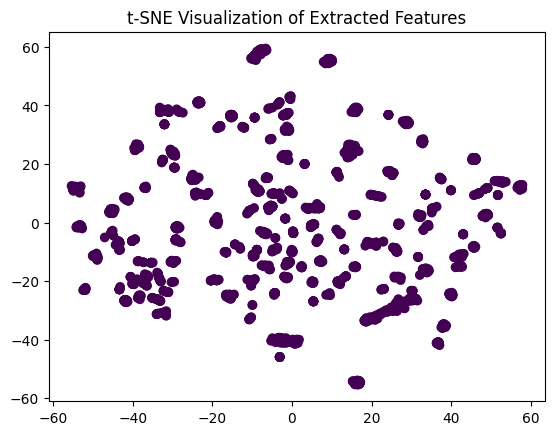

In [52]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'features' is your extracted features
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(features)

labels_ = []
for label in labels:
    if labels_ == 'drowsy':
        labels_.append(0)
    else: labels_.append(1)

# Visualize t-SNE results
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels_, cmap='viridis')
plt.title('t-SNE Visualization of Extracted Features')
plt.show()

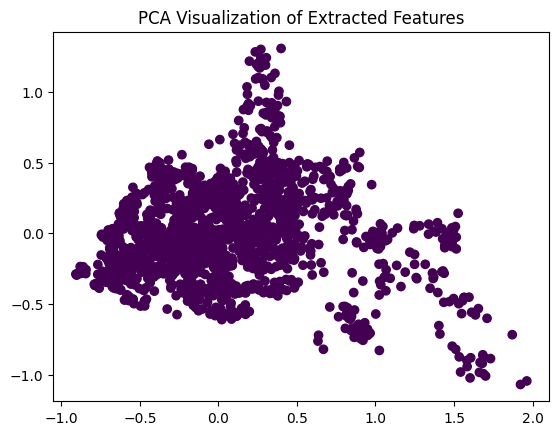

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'features' is your extracted features
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

# Visualize PCA results
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels_, cmap='viridis')
plt.title('PCA Visualization of Extracted Features')
plt.show()

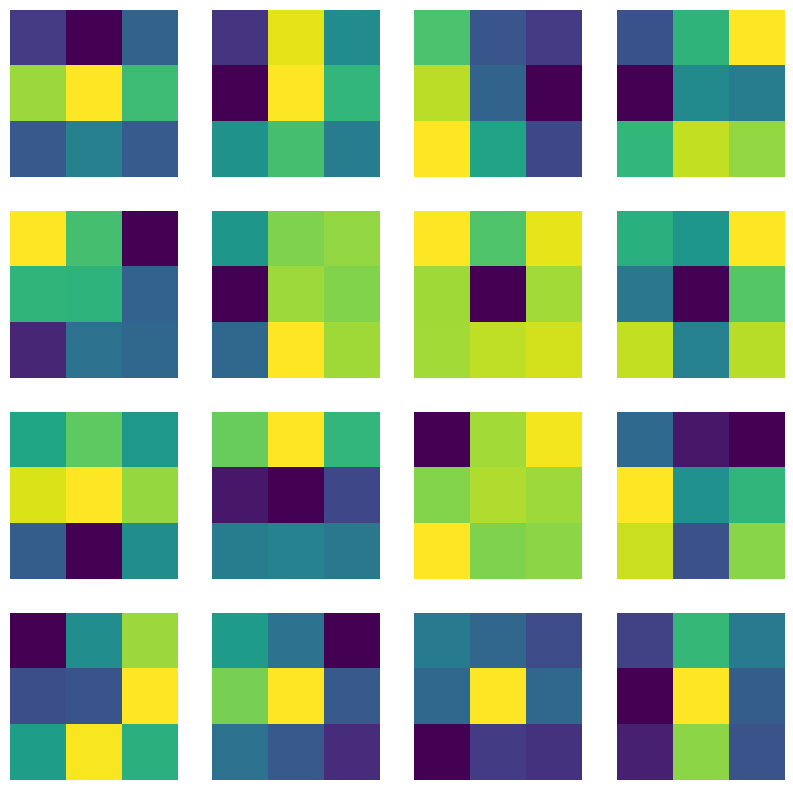

In [57]:
# Assuming 'model' is your MobileNetV2 model
layer_name = 'mobilenetv2_1.00_224'  # Replace with the desired layer name
layer = model.get_layer(layer_name)

# Get the filters of the layer
filters = layer.get_weights()[0]

# Visualize the filters
plt.figure(figsize=(10, 10))
for i in range(min(16, filters.shape[-1])):
    plt.subplot(4, 4, i+1)
    plt.imshow(filters[:, :, 0, i], cmap='viridis')
    plt.axis('off')
plt.show()

In [ ]:
['mobilenetv2_1.00_224', 'global_average_pooling2d_2', 'dense_2']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


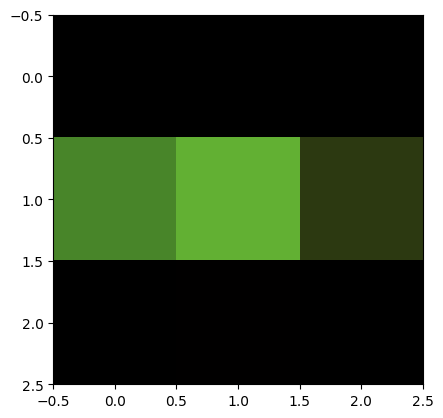

In [61]:
top_layer = model.layers[0]
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')

In [68]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
